<a href="https://colab.research.google.com/github/raghav5102/ML-prediction-models/blob/main/Electronics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ELECTRONICS PRICE PREDICTION

In [ ]:
from fastai.imports import *

In [ ]:
df=pd.read_csv('Train.csv')
df.head()

,Brand,Model_Info,Additional_Description,Locality,City,State,Price
0,1,name0 name234 64gb space grey,1yesr old mobile number 999two905two99 bill c...,878,8,2,15000
1,1,phone 7 name42 name453 new condition box acce...,101004800 1010065900 7000,1081,4,0,18800
2,1,name0 x 256gb leess used good condition,1010010000 seperate screen guard 3 back cover...,495,11,4,50000
3,1,name0 6s plus 64 gb space grey,without 1010020100 id 1010010300 colour 10100...,287,10,7,16500
4,1,phone 7 sealed pack brand new factory outet p...,101008700 10100000 xs max 64 gb made 10100850...,342,4,0,26499


In [ ]:
dft=pd.read_csv('Test.csv')
dft.head()

,Brand,Model_Info,Additional_Description,Locality,City,State
0,1,name0 55s66s66s778xxsxsmax etc,good condition 11months old single scratch we...,570,11,4
1,1,slightly used excellent condition name0 5 sale,101008700 1010030600 1010034300 10100192200 1...,762,8,2
2,1,name0 sx ios12 top letast model bill call,1010017300 delivery,60,13,5
3,1,name87 name0 x 64gb going lowest 41900,phone 1010023400 64 gb excellent condition sale,640,15,5
4,1,name0 5s proper condition one handedly used,full kit available 10100248300 condition 4gb ...,816,2,6


In [ ]:
def apply_cats(df, trn):
    """Changes any columns of strings in df into categorical variables using trn as
    a template for the category codes.
    Parameters:
    -----------
    df: A pandas dataframe. Any columns of strings will be changed to
        categorical values. The category codes are determined by trn.
    trn: A pandas dataframe. When creating a category for df, it looks up the
        what the category's code were in trn and makes those the category codes
        for df.
    Examples:
    ---------
    >>> df = pd.DataFrame({'col1' : [1, 2, 3], 'col2' : ['a', 'b', 'a']})
    >>> df
       col1 col2
    0     1    a
    1     2    b
    2     3    a
    note the type of col2 is string
    >>> train_cats(df)
    >>> df
       col1 col2
    0     1    a
    1     2    b
    2     3    a
    now the type of col2 is category {a : 1, b : 2}
    >>> df2 = pd.DataFrame({'col1' : [1, 2, 3], 'col2' : ['b', 'a', 'a']})
    >>> apply_cats(df2, df)
           col1 col2
        0     1    b
        1     2    a
        2     3    a
    now the type of col is category {a : 1, b : 2}
    """
    for n,c in df.items():
        if (n in trn.columns) and (trn[n].dtype.name=='category'):
            df[n] = c.astype('category').cat.as_ordered()
            df[n].cat.set_categories(trn[n].cat.categories, ordered=True, inplace=True)


In [ ]:
apply_cats(df,dft)

In [ ]:
df.dtypes

Brand                      int64
Model_Info                object
Additional_Description    object
Locality                   int64
City                       int64
State                      int64
Price                      int64
dtype: object

In [ ]:
for col_name in df.columns:
    if(df[col_name].dtype == 'object'):
        df[col_name]= df[col_name].astype('category')
        df[col_name] = df[col_name].cat.codes

df.fillna(method='pad',inplace=True)

In [ ]:
for col_name in dft.columns:
    if(dft[col_name].dtype == 'object'):
        dft[col_name]= dft[col_name].astype('category')
        dft[col_name] = dft[col_name].cat.codes

dft.fillna(method='pad',inplace=True)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
df.head()

,Brand,Model_Info,Additional_Description,Locality,City,State,Price
0,1,992,987,878,8,2,15000
1,1,1892,521,1081,4,0,18800
2,1,1045,232,495,11,4,50000
3,1,695,2075,287,10,7,16500
4,1,1901,901,342,4,0,26499


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

array([ 14396.578,  35195.762,  64074.213,  22152.111,  19864.698,
        41753.758,  19839.348,  57464.552,  27749.028,  21240.719,
        26105.884,  13788.361,  16011.817,  54192.15 ,  32517.907,
        10812.62 ,  39752.844,  16171.875,   4944.825,  22944.172,
        26621.482,  13671.81 ,  19487.523,  53446.596,  30537.298,
        23088.913,  25214.933,  34506.461,  21021.348,  18254.325,
        10135.214,  18192.309,  32190.428,  26337.308,  15645.079,
        10816.463,  20992.037,  27736.07 ,  24207.952,  42086.596,
        15306.173,  44867.711,   3622.803,  44117.345,  24989.713,
        16601.8  ,  19147.134,  33782.362,  16384.438,  10016.963,
         9146.219,   3700.9  ,  17869.986,  30540.198,  11054.908,
        34903.498,  15416.439,  27493.383,  42255.743,  13592.874,
         5837.086,  18709.924,  10506.442,  28670.976,  22009.523,
        25787.65 ,  68552.331,  48707.133,  13899.576,  11037.048,
        36325.871,  12299.701,  22034.803,   3535.14 ,  11768.

,0
0,14396.578
1,35195.762
2,64074.213
3,22152.111
4,19864.698


Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [ ]:
df.head()

,Brand,Model_Info,Additional_Description,Locality,City,State,Price
0,1,992,987,878,8,2,15000
1,1,1892,521,1081,4,0,18800
2,1,1045,232,495,11,4,50000
3,1,695,2075,287,10,7,16500
4,1,1901,901,342,4,0,26499


In [ ]:
def unique_items(list1, list2):
  a = list1
  b = list2
  a.extend(b)
  return list(set(a))

In [ ]:
y_train=df['Price']
X_train=df.drop('Price',axis=1)
X_test=dft

In [ ]:
from sklearn.preprocessing import LabelEncoder

le_modelinf = LabelEncoder()
all_titles = unique_items(list(X_train['Model_Info']),list(X_test['Model_Info']))
le_modelinf.fit(all_titles)

le_AdditionalDescription= LabelEncoder()
all_etypes = unique_items(list(X_train['Additional_Description']),list(X_test['Additional_Description']))
le_AdditionalDescription.fit(all_etypes)


LabelEncoder()

In [ ]:
X_train['Model_Info'] = le_modelinf.transform(X_train['Model_Info'])

X_train['Additional_Description'] = le_AdditionalDescription.transform(X_train['Additional_Description'])

In [ ]:
X_train.head()

,Brand,Model_Info,Additional_Description,Locality,City,State
0,1,1358,1378,878,8,2
1,1,2611,738,1081,4,0
2,1,1443,339,495,11,4
3,1,945,2941,287,10,7
4,1,2626,1263,342,4,0


In [ ]:
X_test['Model_Info'] = le_modelinf.transform(X_test['Model_Info'])

X_test['Additional_Description'] = le_AdditionalDescription.transform(X_test['Additional_Description'])

In [ ]:
X_test.head()

,Brand,Model_Info,Additional_Description,Locality,City,State
0,1,696,1935,570,11,4
1,1,2749,1270,762,8,2
2,1,1426,484,60,13,5
3,1,2369,2458,640,15,5
4,1,721,1885,816,2,6


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [ ]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
clf=RandomForestRegressor(n_estimators=1000)

In [ ]:
clf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_test=clf.predict(X_test)

In [ ]:
answer=pd.DataFrame([y_test]).transpose()

In [ ]:
answer.head()

,0
0,7108.197
1,18512.669
2,12690.995
3,27420.426
4,8034.664


In [ ]:
answer

,0
0,7108.197
1,18512.669
2,12690.995
3,27420.426
4,8034.664
...,...
992,23252.637
993,38543.540
994,11118.444
995,16361.499


In [ ]:
answer.to_csv('electronics.csv',index=False)
!cp electronics.csv "drive/My Drive/"

In [ ]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)
fi = rf_feat_importance(clf, X_train); 

In [ ]:
fi

,cols,imp
1,Model_Info,0.675824
3,Locality,0.096220
2,Additional_Description,0.093717
0,Brand,0.072915
4,City,0.032186
5,State,0.029138


In [ ]:
to_keep = fi[fi.imp>0.08].cols;

In [ ]:
to_keep

1                Model_Info
3                  Locality
2    Additional_Description
Name: cols, dtype: object

In [ ]:
X_train=X_train[to_keep]

In [ ]:
X_train.head()

,Model_Info,Locality,Additional_Description
0,1358,878,1378
1,2611,1081,738
2,1443,495,339
3,945,287,2941
4,2626,342,1263


In [ ]:
X_test=X_test[to_keep]

In [ ]:
clfd=RandomForestRegressor(n_estimators=2000)

In [ ]:
clfd.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=2000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_test = clfd.predict(X_test)

In [ ]:
answer=pd.DataFrame([y_test]).transpose()
answer.head()

,0
0,7840.9495
1,17595.1715
2,13694.2465
3,35502.7840
4,7641.6230


In [ ]:
answer.to_csv('electronics.csv',index=False)
!cp electronics.csv "drive/My Drive/"

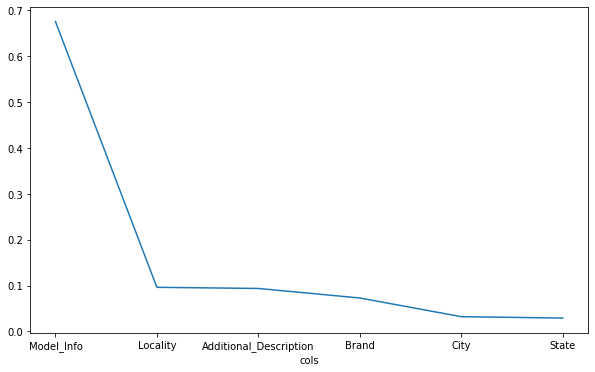

In [ ]:


fi.plot('cols', 'imp', figsize=(10,6), legend=False);

